## Multiscale Retinex (MSR)

This notebook explores two advanced image enhancement techniques: **Multi-Scale Retinex with Chromaticity Preservation (MSRCP)** and **Multi-Scale Retinex with Colour Restoration (MSRCR)**. These methods improve image visibility by enhancing details while maintaining natural colour balance.

For a deeper understanding of the underlying algorithms, refer to the original publication: [IPOL - Multiscale Retinex](https://www.ipol.im/pub/art/2014/107/?utm_source=doi).

In [14]:
import os
if not os.path.isdir("retinex"):
    !git clone https://github.com/muggledy/retinex.git
else:
    print("[ INFO ] Retinex repository was already downloaded.")

[ INFO ] Retinex repository was already downloaded.


In [15]:
from retinex.code.tools import cv2_heq
from retinex.code.plot import contrast_plot,demo_viper_with_retinex
from retinex.code.plot import contrast_plot,demo_viper_with_retinex
from retinex.code.retinex import retinex_FM,retinex_SSR,retinex_MSR,retinex_MSRCR,retinex_gimp,retinex_MSRCP,retinex_AMSR

In [16]:
import glob
imgs = sorted(glob.glob("Dataset/*"))

In [18]:
import cv2
output_name_cr = "Output_MSRCR"
output_name_cp = "Output_MSRCP"
if not os.path.isdir(output_name_cr):
    os.makedirs(output_name_cr)

if not os.path.isdir(output_name_cp):
    os.makedirs(output_name_cp)

for img in imgs:
    im = cv2.imread(img)
    im = cv2.resize(im, (800, 600))
    
    img_MSRCR = retinex_MSRCR(im)
    # img_MSRCR = cv2.cvtColor(img_MSRCR, cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(output_name_cr, "out_" + os.path.basename(img)), img_MSRCR)
    
    img_MSRCP = retinex_MSRCP(im)
    # img_MSRCP = cv2.cvtColor(img_MSRCP, cv2.COLOR_RGB2BGR)
    cv2.imwrite(os.path.join(output_name_cp, "out_" + os.path.basename(img)), img_MSRCP)

@measure_time: retinex_MSRCR took 0.36724424362182617 seconds
@measure_time: retinex_MSRCP took 0.12806487083435059 seconds
@measure_time: retinex_MSRCR took 0.36371922492980957 seconds
@measure_time: retinex_MSRCP took 0.14287877082824707 seconds
@measure_time: retinex_MSRCR took 0.357440710067749 seconds
@measure_time: retinex_MSRCP took 0.133453369140625 seconds
@measure_time: retinex_MSRCR took 0.3631911277770996 seconds
@measure_time: retinex_MSRCP took 0.1388235092163086 seconds
@measure_time: retinex_MSRCR took 0.3879411220550537 seconds
@measure_time: retinex_MSRCP took 0.13176321983337402 seconds
@measure_time: retinex_MSRCR took 0.3653140068054199 seconds
@measure_time: retinex_MSRCP took 0.13914155960083008 seconds
@measure_time: retinex_MSRCR took 0.3618659973144531 seconds
@measure_time: retinex_MSRCP took 0.13103342056274414 seconds
@measure_time: retinex_MSRCR took 0.3608670234680176 seconds
@measure_time: retinex_MSRCP took 0.14139413833618164 seconds
@measure_time: ret

## Visualisations of the results

In [27]:
imgs_out_MSRCP = sorted(glob.glob("Output_MSRCP/*"))
imgs_out_MSRCR = sorted(glob.glob("Output_MSRCR/*"))

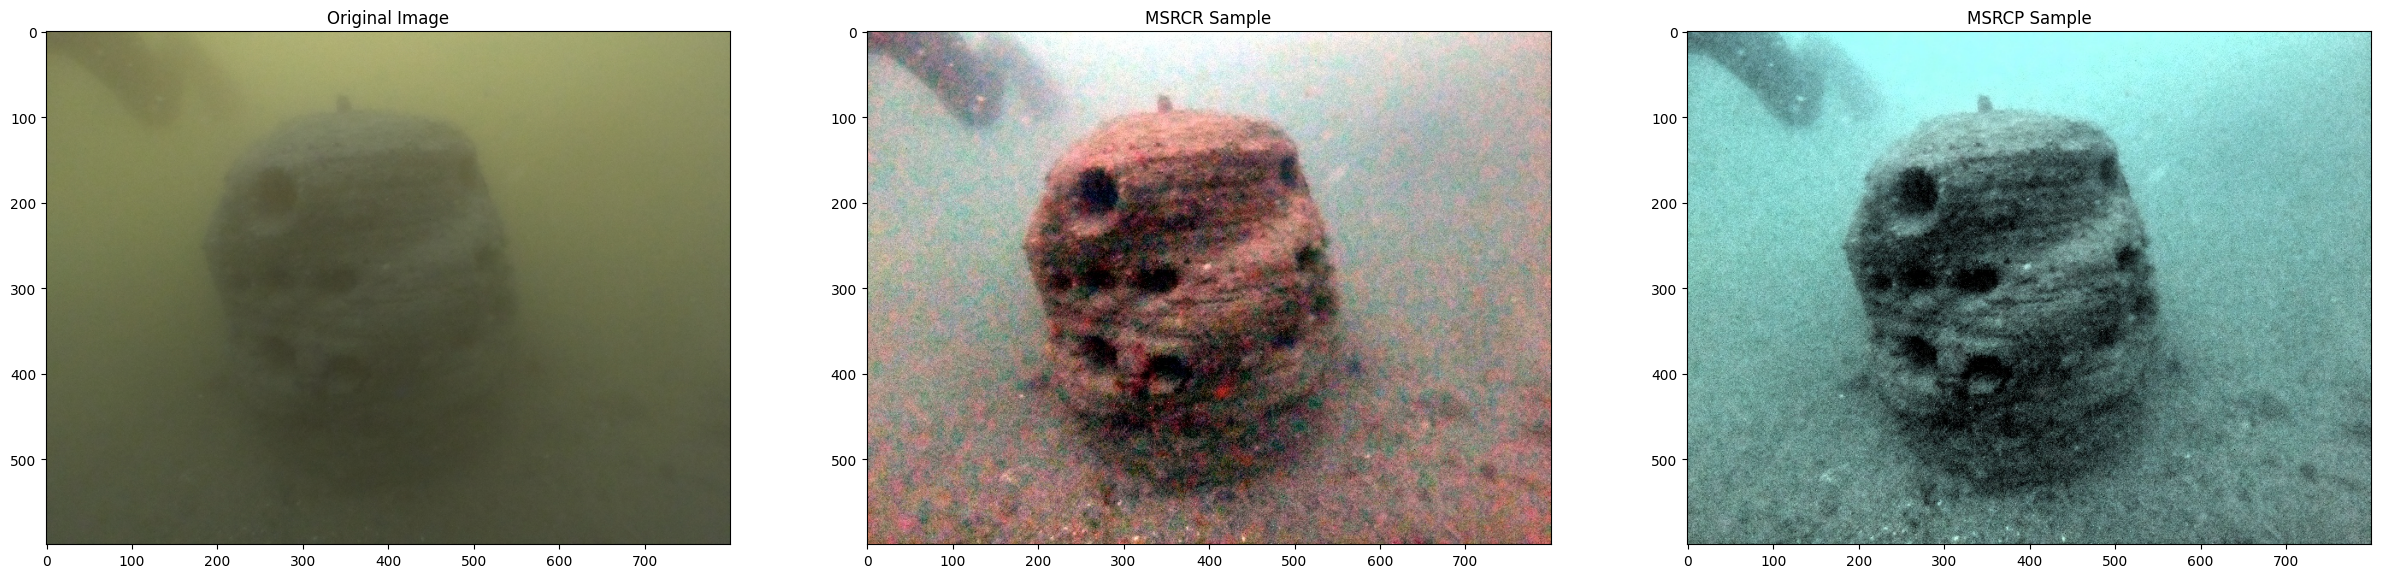

In [30]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(ncols=3, figsize=(30, 30))

img = cv2.imread(imgs[1])
img = cv2.resize(img, (800, 600))
ax[0].imshow(img)
ax[0].set_title("Original Image")

img_out_MSRCR = cv2.imread(imgs_out_MSRCR[1])
img_out_MSRCR = cv2.cvtColor(img_out_MSRCR, cv2.COLOR_RGB2BGR)
ax[1].imshow(img_out_MSRCR)
ax[1].set_title("MSRCR Sample")

img_out_MSRCP = cv2.imread(imgs_out_MSRCP[1])
img_out_MSRCP = cv2.cvtColor(img_out_MSRCP, cv2.COLOR_RGB2BGR)
ax[2].imshow(img_out_MSRCP)
ax[2].set_title("MSRCP Sample")

plt.show()

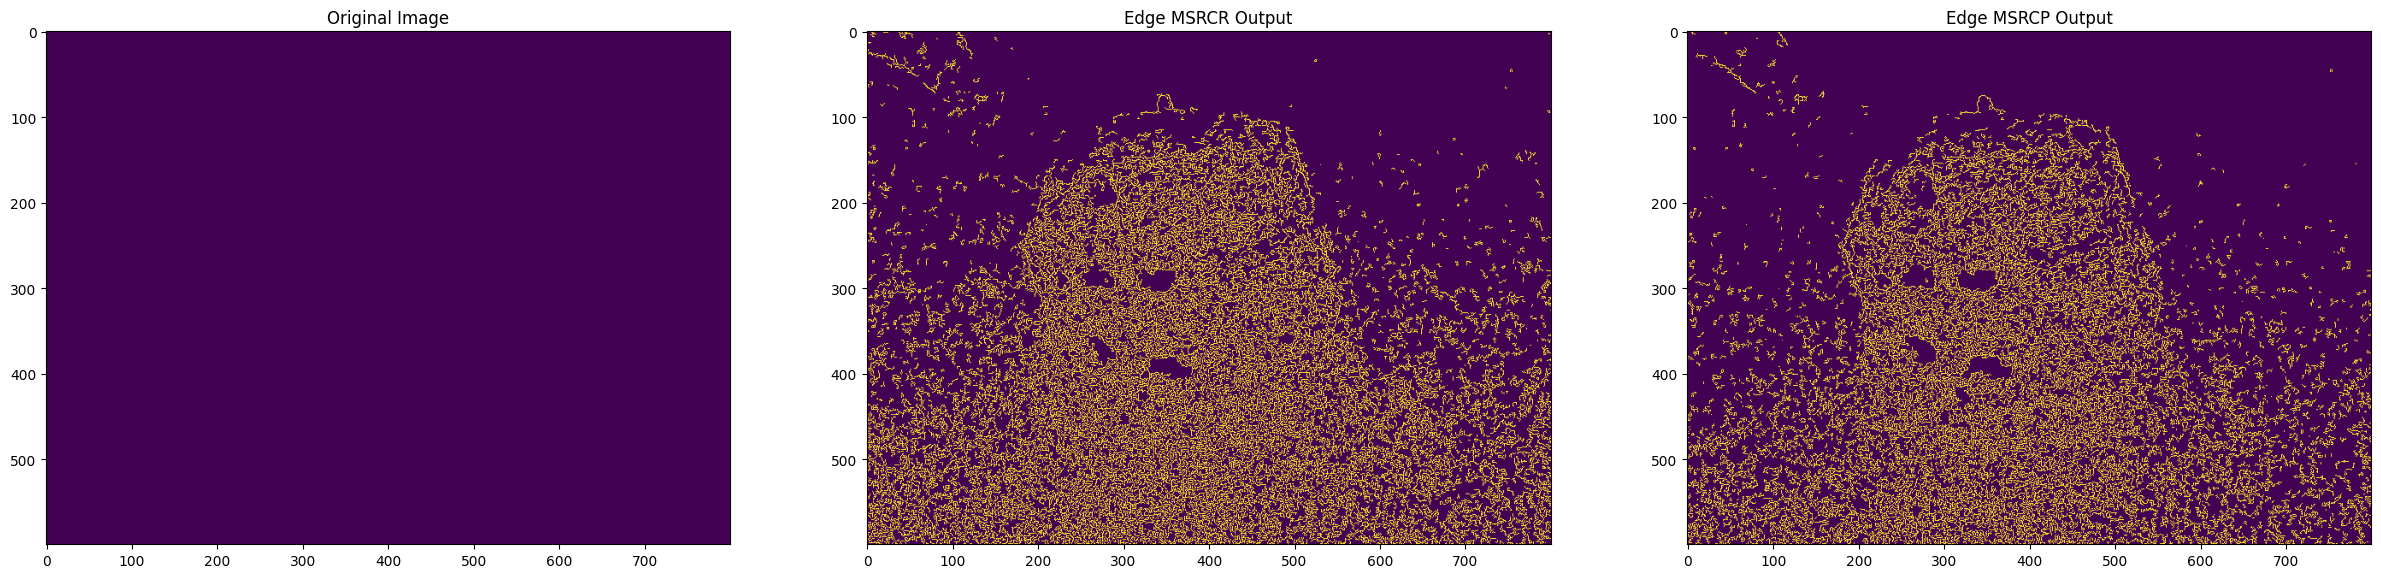

In [31]:
edg_MSRCR = cv2.Canny(img_out_MSRCR,100,200)
edg_MSRCP = cv2.Canny(img_out_MSRCP,100,200)
img = cv2.resize(img, (800, 600))
edg_in = cv2.Canny(img,100,200)

fig, ax = plt.subplots(ncols=3, figsize=(30, 30))
ax[0].imshow(edg_in)
ax[0].set_title("Original Image")

ax[1].imshow(edg_MSRCR)
ax[1].set_title("Edge MSRCR Output")

ax[2].imshow(edg_MSRCP)
ax[2].set_title("Edge MSRCP Output")

plt.show()

## Evalution metrics

Please refer to the [original source](https://github.com/Riccellisp/ProjetoPecem/blob/ba8c5e7b991e93044e3c86c42e48d3df4c9595fb/metrics.py) of the metric.

In [34]:
import sys
import math
import numpy as np
from skimage import color,filters
from skimage.metrics import structural_similarity as ssim

def plipsum(i,j,gamma=1026):
    return i + j - i * j / gamma

def plipsub(i,j,k=1026):
    return k * (i - j) / (k - j)

def plipmult(c,j,gamma=1026):
    return gamma - gamma * (1 - j / gamma)**c

def logamee(ch,blocksize=8):

    num_x = math.ceil(ch.shape[0] / blocksize)
    num_y = math.ceil(ch.shape[1] / blocksize)

    s = 0
    w = 1. / (num_x * num_y)
    for i in range(num_x):

        xlb = i * blocksize
        if i < num_x - 1:
            xrb = (i+1) * blocksize
        else:
            xrb = ch.shape[0]

        for j in range(num_y):

            ylb = j * blocksize
            if j < num_y - 1:
                yrb = (j+1) * blocksize
            else:
                yrb = ch.shape[1]

            block = ch[xlb:xrb,ylb:yrb]
            blockmin = float(np.min(block))
            blockmax = float(np.max(block))

            top = plipsub(blockmax,blockmin)
            bottom = plipsum(blockmax,blockmin)
            m = bottom and top / bottom or 0
            if m ==0.:
                s+=0
            else:
                s += (m) * np.log(m)

    return plipmult(w,s)

def eme(img,rowSample,columnSample):
	grayImg = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
	rowSize, columnSize = grayImg.shape
	nRows = int(rowSize/rowSample)
	nColumns = int(columnSize/columnSample)
	incompleteRow = math.ceil(rowSize/rowSample) - nRows
	incompleteColumn = math.ceil(columnSize/columnSample) - nColumns

	somatory = 0
	nBlocks = nRows*nColumns
	for i in range(0,nRows):
		for j in range(0,nColumns):
			imax=grayImg[i*rowSample:(i+1)*rowSample,j*columnSample:(j+1)*rowSample].max()
			imin=grayImg[i*rowSample:(i+1)*rowSample,j*columnSample:(j+1)*rowSample].min()
			if imin==0:
				imin=1
			if imax==0:
				imax=1
			somatory = somatory + 20*math.log(imax/imin)

	if incompleteColumn==1:
		for i in range(0,nRows):
			imax=grayImg[i*rowSample:(i+1)*rowSample,nColumns*columnSample:columnSize].max()
			imin=grayImg[i*rowSample:(i+1)*rowSample,nColumns*columnSample:columnSize].min()
			if imin==0:
				imin=1
			if imax==0:
				imax=1
			somatory = somatory + 20*math.log(imax/imin)
			nBlocks = nBlocks + 1
	if incompleteRow==1:
		for j in range(0,nColumns):
			imax=grayImg[grayImg[nRows*rowSample:rowSize,j*columnSample:(j+1)*columnSample]].max()
			imin=grayImg[grayImg[nRows*rowSample:rowSize,j*columnSample:(j+1)*columnSample]].min()
			if imin==0:
				imin=1
			if imax==0:
				imax=1
			somatory = somatory + 20*math.log(imax/imin)
			nBlocks = nBlocks + 1
	if incompleteRow==1 and incompleteColumn==1:
		imax=grayImg[nRows*rowSample:rowSize,nColumns*columnSample:columnSize].max()
		imin=grayImg[nRows*rowSample:rowSize,nColumns*columnSample:columnSize].max()
		if imin==0:
			imin=1
		if imax==0:
			imax=1
		somatory = somatory + 20*math.log(imax/imin)
		nBlocks = nBlocks + 1
	return somatory/nBlocks

def UCIQE(a,c1=0.4680,c2 = 0.2745,c3 = 0.2576):
    """
    M. Yang and A. Sowmya, "An Underwater Color Image Quality Evaluation Metric" in IEEE Transactions on Image Processing,
    vol. 24, no. 12, pp. 6062-6071, Dec. 2015, doi: 10.1109/TIP.2015.2491020.
    
    The Underwater Colour Image Quality Evaluation Metric (UCIQE) is a metric based on the linear combination of chroma (purity),
    saturation, and contrast, primarily for underwater images but also influenced by recent studies on the evaluation of atmospheric
    colour images.
    """
    rgb = a
    lab = color.rgb2lab(a)
    l = lab[:,:,0]

    chroma = (lab[:,:,1]**2 + lab[:,:,2]**2)**0.5
    uc = np.mean(chroma)
    sc = (np.mean((chroma - uc)**2))**0.5

    top = int(np.round(0.01*l.shape[0]*l.shape[1]))
    sl = np.sort(l,axis=None)
    isl = sl[::-1]
    conl = np.mean(isl[:top])-np.mean(sl[:top])

    satur = []
    chroma1 = chroma.flatten()
    l1 = l.flatten()
    for i in range(len(l1)):
      if chroma1[i] == 0: satur.append(0)
      elif l1[i] == 0: satur.append(0)
      else: satur.append(chroma1[i] / l1[i])

    us = np.mean(satur)

    return  c1 * sc + c2 * conl + c3 * us

def UIQM(a,p1=0.0282,p2=0.2953,p3=3.5753):
    """
    K. Panetta, C. Gao and S. Agaian, Human-Visual-System-Inspired Underwater Image Quality Measures,
    in IEEE Journal of Oceanic Engineering, vol. 41, no. 3, pp. 541-551, July 2016, doi: 10.1109/JOE.2015.2469915.
    
    Similar to UCIQE, but more up-to-date. It takes into account the measure of colouration, sharpness, and contrast.
    """

    rgb = a
    gray = color.rgb2gray(a)
    rg = rgb[:,:,0] - rgb[:,:,1]
    yb = (rgb[:,:,0] + rgb[:,:,1]) / 2 - rgb[:,:,2]
    rgl = np.sort(rg,axis=None)
    ybl = np.sort(yb,axis=None)
    al1 = 0.1
    al2 = 0.1
    T1 = int(al1 * len(rgl))
    T2 = int(al2 * len(rgl))
    rgl_tr = rgl[T1:-T2]
    ybl_tr = ybl[T1:-T2]

    urg = np.mean(rgl_tr) # μ^2_α,RG
    s2rg = np.mean((rgl_tr - urg) ** 2)  # σ2α,RG
    uyb = np.mean(ybl_tr) # μ^2_α,YB
    s2yb = np.mean((ybl_tr- uyb) ** 2) # σ2α,YB

    uicm =-0.0268 * np.sqrt(urg**2 + uyb**2) + 0.1586 * np.sqrt(s2rg + s2yb)

    Reme = eme(a,8,8)
    Geme = eme(a,8,8)
    Beme = eme(a,8,8)
    uism = 0.299 * Reme + 0.587 * Geme + 0.114 * Beme

    uiconm = logamee(gray)
    uiqm = p1 * uicm + p2 * uism + p3 * uiconm

    return uiqm

def CCF(imageRGB):
	"""
    @article{WANG2018904,
    	title = {An imaging-inspired no-reference underwater color image quality assessment metric},
    	journal = {Computers & Electrical Engineering},
    	volume = {70},
    	pages = {904-913},
    	year = {2018},
    	issn = {0045-7906},
    	doi = {https://doi.org/10.1016/j.compeleceng.2017.12.006},
    	url = {https://www.sciencedirect.com/science/article/pii/S0045790617324953},
    	author = {Yan Wang and Na Li and Zongying Li and Zhaorui Gu and Haiyong Zheng and Bing Zheng and Mengnan Sun},
    	keywords = {No-reference image quality assessment, Underwater imaging, Underwater image, Underwater color image quality},
    	abstract = {Underwater color image quality assessment (IQA) plays an important role in analysis and applications of underwater imaging as well as image processing algorithms. This paper presents a new metric inspired by the imaging analysis on underwater absorption and scattering characteristics, dubbed the CCF. This metric is feature-weighted with a combination of colorfulness index, contrast index and fog density index, which can quantify the color loss caused by absorption, the blurring caused by forward scattering and the foggy caused by backward scattering, respectively. Then multiple linear regression is used to calculate three weighted coefficients. A new underwater image database is built to illustrate the performance of the proposed metric. Experimental results show a strong correlation between the proposed metric and mean opinion score (MOS). The proposed CCF metric outperforms many of the leading atmospheric IQA metrics, and it can effectively assess the performance of underwater image enhancement and image restoration methods.}
    }

	This metric is weighted by features using a combination of a colourfulness index, a contrast index, and a fog density index,
    which can quantify colour loss caused by absorption, blurring caused by forward scattering, and fogging caused by backward 
    scattering, respectively.
	"""
	rgb=imageRGB
	gray = color.rgb2gray(imageRGB)
    
	# Passo 1
	Rij=np.log(rgb[:,:,0])-np.mean(rgb[:,:,0])
	Gij=np.log(rgb[:,:,1])-np.mean(rgb[:,:,1])
	Bij=np.log(rgb[:,:,2])-np.mean(rgb[:,:,2])

	# Passo 2
	a = rgb[:,:,0] - rgb[:,:,1]
	b = (rgb[:,:,0] + rgb[:,:,1]) / 2 - rgb[:,:,2]

	var_a  = np.var(a)
	var_b  = np.var(b)
	mean_a = np.mean(a)
	mean_b = np.mean(b)

	ccf=(math.sqrt(var_a+var_b)+0.3*math.sqrt(var_a+var_b)) /85.59

	return ccf

In [36]:
%%time
UIQM_list, UCIQE_list, CCF_list  = list(), list(), list()
UIQM_MSRCR_list, UCIQE_MSRCR_list, CCF_MSRCR_list  = list(), list(), list()
UIQM_MSRCP_list, UCIQE_MSRCP_list, CCF_MSRCP_list  = list(), list(), list()

for img in imgs:
  im = cv2.imread(img)
  im = cv2.resize(im, (800, 600))
  UIQM_list.append(UIQM(im))
  UCIQE_list.append(UCIQE(im))
  CCF_list.append(CCF(im))

for img in imgs_out_MSRCR:
  im = cv2.imread(img)
  im = cv2.resize(im, (800, 600))
  UIQM_MSRCR_list.append(UIQM(im))
  UCIQE_MSRCR_list.append(UCIQE(im))
  CCF_MSRCR_list.append(CCF(im))

for img in imgs_out_MSRCP:
  im = cv2.imread(img)
  im = cv2.resize(im, (800, 600))
  UIQM_MSRCP_list.append(UIQM(im))
  UCIQE_MSRCP_list.append(UCIQE(im))
  CCF_MSRCP_list.append(CCF(im))

/tmp/ipykernel_46445/2061535739.py:200: RuntimeWarning: divide by zero encountered in log
  Rij=np.log(rgb[:,:,0])-np.mean(rgb[:,:,0])
/tmp/ipykernel_46445/2061535739.py:201: RuntimeWarning: divide by zero encountered in log
  Gij=np.log(rgb[:,:,1])-np.mean(rgb[:,:,1])
/tmp/ipykernel_46445/2061535739.py:202: RuntimeWarning: divide by zero encountered in log
  Bij=np.log(rgb[:,:,2])-np.mean(rgb[:,:,2])


CPU times: user 25.4 s, sys: 2.86 s, total: 28.3 s
Wall time: 26.5 s


In [47]:
from tabulate import tabulate
data = [
    ["UIQM", np.mean(UIQM_list), np.std(UIQM_list)],
    ["UCIQE", np.mean(UCIQE_list), np.std(UCIQE_list)],
    ["CCF", np.mean(CCF_list), np.std(CCF_list)],
    ["UIQM_MSRCR", np.mean(UIQM_MSRCR_list), np.std(UIQM_MSRCR_list)],
    ["UCIQE_MSRCR", np.mean(UCIQE_MSRCR_list), np.std(UCIQE_MSRCR_list)],
    ["CCF_MSRCR", np.mean(CCF_MSRCR_list), np.std(CCF_MSRCR_list)],
    ["UIQM_MSRCP", np.mean(UIQM_MSRCP_list), np.std(UIQM_MSRCP_list)],
    ["UCIQE_MSRCP", np.mean(UCIQE_MSRCP_list), np.std(UCIQE_MSRCP_list)],
    ["CCF_MSRCP", np.mean(CCF_MSRCP_list), np.std(CCF_MSRCP_list)]
]

headers = ["Metric", "Mean", "Standard Deviation"]
print(tabulate(data, headers=headers, tablefmt="simple_grid", numalign="right"))

┌─────────────┬──────────┬──────────────────────┐
│ Metric      │     Mean │   Standard Deviation │
├─────────────┼──────────┼──────────────────────┤
│ UIQM        │ 0.400654 │             0.156042 │
├─────────────┼──────────┼──────────────────────┤
│ UCIQE       │  16.9709 │              2.73291 │
├─────────────┼──────────┼──────────────────────┤
│ CCF         │ 0.755423 │              0.30076 │
├─────────────┼──────────┼──────────────────────┤
│ UIQM_MSRCR  │  6.15633 │               1.2798 │
├─────────────┼──────────┼──────────────────────┤
│ UCIQE_MSRCR │  31.4397 │             0.618767 │
├─────────────┼──────────┼──────────────────────┤
│ CCF_MSRCR   │  1.95256 │             0.112827 │
├─────────────┼──────────┼──────────────────────┤
│ UIQM_MSRCP  │  6.39093 │              1.56724 │
├─────────────┼──────────┼──────────────────────┤
│ UCIQE_MSRCP │  31.4327 │             0.503208 │
├─────────────┼──────────┼──────────────────────┤
│ CCF_MSRCP   │ 0.926394 │             0.257122 │
